In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\internship_task\train.csv")
data.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [3]:
data.shape
# category={'A':1,'B':2,'C':3,'D',4}
# data['category']=data['category'].map(category)

(14999, 9)

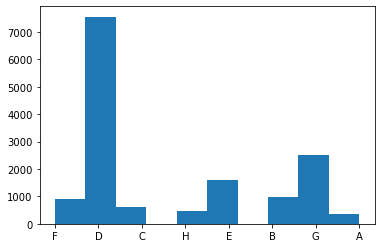

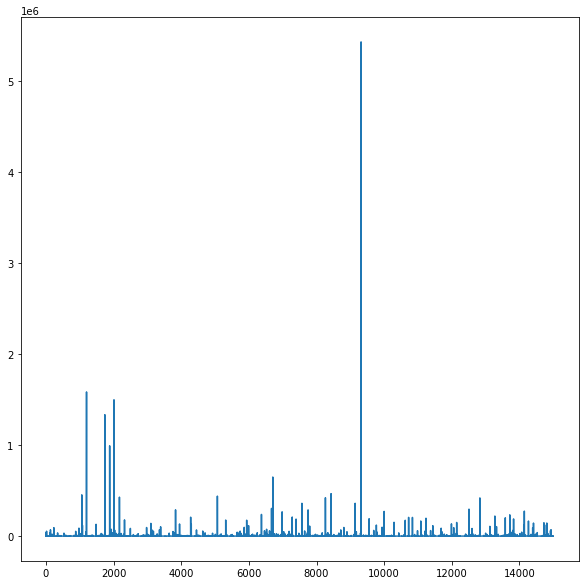

In [4]:
plt.hist(data['category'])
plt.show()
plt.figure(figsize=(10,10))
plt.plot(data['adview'])
plt.show()

In [5]:
data=data[data['adview']<2000000]
data.shape

(14998, 9)

In [6]:
data=data[data['views']!='F']
data=data[data['likes']!='F']
data=data[data['dislikes']!='F']
data=data[data['comment']!='F']

data.shape


(14636, 9)

In [7]:
data['views']=data['views'].astype(int)
data['likes']=data['likes'].astype(int)
data['dislikes']=data['dislikes'].astype(int)
data['comment']=data['comment'].astype(int)

data.describe()

,adview,views,likes,dislikes,comment
count,1.463600e+04,1.463600e+04,14636.000000,14636.000000,14636.000000
mean,1.695191e+03,7.107934e+05,2784.093946,254.150724,409.035597
std,2.788993e+04,2.731062e+06,8936.295816,1029.257991,1511.180179
min,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000
25%,1.000000e+00,3.151425e+04,88.000000,7.000000,7.000000
50%,2.000000e+00,1.586610e+05,450.000000,38.000000,46.000000
75%,6.000000e+00,5.829575e+05,1861.500000,166.250000,224.000000
max,1.583846e+06,1.380479e+08,283824.000000,49449.000000,75045.000000


In [8]:
data['category'].unique()
cate={}
k=0
for i in data['category'].unique():
    k+=1
    cate[i]=k
data['category']=data['category'].map(cate)    

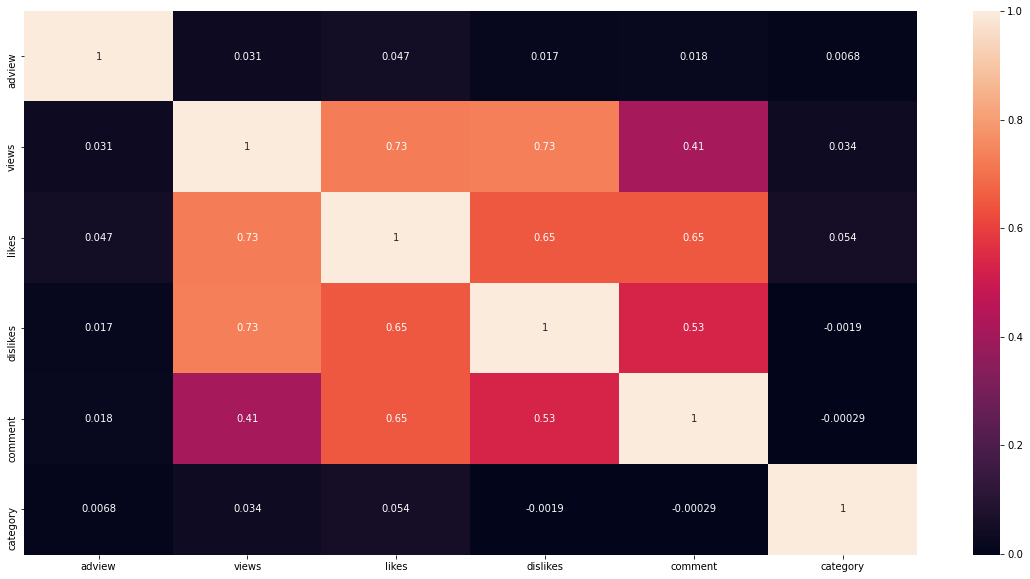

In [9]:
import seaborn as sns
corr=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,1
1,2741,2,1707,56,2,6,2185,3040,2
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,4
4,122,1,666,1,0,0,2091,1963,2


In [11]:
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train=pd.read_csv(r"C:\Users\Lenovo\internship_task\train.csv")
mp = pd.read_csv(r"C:\Users\Lenovo\internship_task\train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,1
1,2741,2,1707,56,2,6,2185,570,2
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,4
4,122,1,666,1,0,0,2091,31,2


In [12]:
Y_train = pd.DataFrame(data = data.iloc[:, 1].values, columns = ['target'])
data=data.drop(["adview"],axis=1)
data=data.drop(["vidid"],axis=1)
print(data.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)
print(X_train.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print(X_train.mean())

     views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         1
1     1707     56         2        6       2185       570         2
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         4
4      666      1         0        0       2091        31         2
(11708, 7)
0.1538867408939747


In [13]:
from sklearn import metrics
def error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    

# Support Vector
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
error(X_test,y_test, supportvector_regressor)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 1696.9516993281597
Mean Squared Error: 833685723.3301424
Root Mean Squared Error: 28873.6163881517


In [14]:
#linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
error(X_test,y_test, linear_regression)

Mean Absolute Error: 3711.028131310587
Mean Squared Error: 835524757.8592943
Root Mean Squared Error: 28905.44512473894


In [15]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
error(X_test,y_test, decision_tree)


Mean Absolute Error: 2752.6157786885246
Mean Squared Error: 897745693.6000683
Root Mean Squared Error: 29962.40466985366


In [16]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
error(X_test,y_test, random_forest)

<ipython-input-16-dacbb0f0fb98>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3291.6068546791876
Mean Squared Error: 633773740.1925889
Root Mean Squared Error: 25174.863260653252


In [17]:
# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 816us/step - loss: 767407360.0000 - mean_squared_error: 767407360.0000
Epoch 2/100
366/366 [==============================] - 0s 718us/step - loss: 767397824.0000 - mean_squared_error: 767397824.0000
Epoch 3/100
366/366 [==============================] - 0s 884us/step - loss: 767371776.0000 - mean_squared_error: 767371776.0000
Epoch 4/100
366/366 [==============================] - 0s 796us/step - loss: 767321216.0000 - mean_squared_error: 767321216.0000
Epoch 5/100
366/366 [==============================] - 0s 764us/step - loss: 767231360.0000 - mean_squared_error: 767231360.0000
Epoch 6/100
366/366 [==============================] - 0s 821us/step - loss: 767108736.0000 - mean_squared_error: 767108736.0000
Epoch 7/100
366/366 [==============================] - 0s 794us/step - loss: 766959104.0000 - mean_squared_error: 766959104.0000
Epoch 8/100
366/366 [==============================] - 0s 741us/step - loss: 766775424.0000 - mea

In [43]:
#Save Random Forest model
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")


['decisiontree_youtubeadview.pkl']

In [19]:
#prediction

data=pd.read_csv(r"C:\Users\Lenovo\internship_task\test.csv")
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [20]:
data=data[data['views']!='F']
data=data[data['likes']!='F']
data=data[data['dislikes']!='F']
data=data[data['comment']!='F']

data['views']=data['views'].astype(int)
data['likes']=data['likes'].astype(int)
data['dislikes']=data['dislikes'].astype(int)
data['comment']=data['comment'].astype(int)

data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [21]:
data['category'].unique()
cate={}
k=0
for i in data['category'].unique():
    k+=1
    cate[i]=k
data['category']=data['category'].map(cate) 
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,1
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,2
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,3
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,4
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,1


In [22]:
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])
data=data.drop(['vidid'],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,1
1,1040132,8171,340,1047,1825,2055,2
2,28534,31,11,1,1009,1506,3
3,1316715,2284,250,274,116,2265,4
4,1893173,2519,225,116,1892,1625,1


In [23]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train=pd.read_csv(r"C:\Users\Lenovo\internship_task\test.csv")
mp = pd.read_csv(r"C:\Users\Lenovo\internship_task\test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,1
1,1040132,8171,340,1047,1825,389,2
2,28534,31,11,1,1009,2274,3
3,1316715,2284,250,274,116,595,4
4,1893173,2519,225,116,1892,188,1


In [31]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
print(data.mean())

0.14988327523015998


In [73]:
import csv
model=joblib.load("decisiontree_youtubeadview.pkl")
pred=model.predict(data)
pred_lst=list(pred)

filename="prediction.csv"
with open(filename,'w') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(['Adviews'])
    for i in pred_lst:
        csvwriter.writerow([i])
        
    


In [74]:
model.score(X_test,y_test)

-0.08056690599951222